Fitting 10 folds for each of 4 candidates, totalling 40 fits
=== Best Parameters ===
{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

=== KNN Regressor Performance Metrics ===
               MAE       MSE      RMSE        R2
Training  0.000000  0.000000  0.000000  1.000000
Testing   0.112692  0.055012  0.234547  0.955493


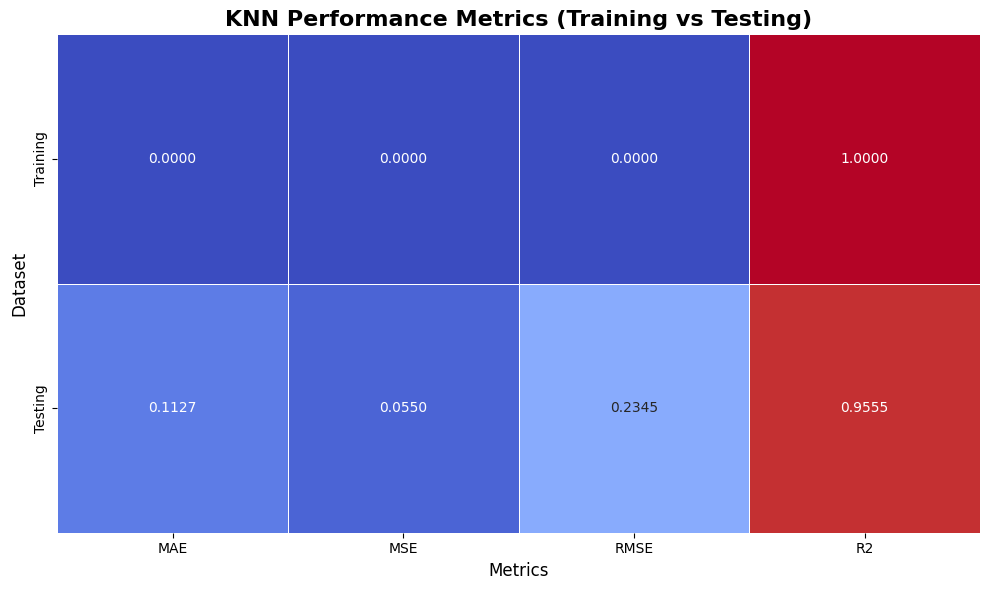

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data.csv')

# Separate the features and target variable
X = data.drop(columns=['Target'])
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn_model = KNeighborsRegressor()

# Set up the hyperparameter grid
param_grid = {
    'n_neighbors': [19],         # Different numbers of neighbors to test
    'weights': ['uniform', 'distance'],      # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']     # Distance metrics to use
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on both training and testing data
y_train_pred = best_knn_model.predict(X_train_scaled)
y_test_pred = best_knn_model.predict(X_test_scaled)

# Calculate performance metrics for training and testing
metrics = {
    'MAE': [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)],
    'MSE': [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))],
    'R2': [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
}

# Convert metrics to a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics, index=['Training', 'Testing'])

# Print the best parameters and metrics table
print(f"Best Parameters: {best_params}")
print("\nPerformance Metrics:")
print(metrics_df)

# Plot a heatmap of the metrics for better comparison
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".4f", cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Performance Metrics for Training and Testing', fontsize=16, weight='bold')
plt.ylabel('Dataset', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.tight_layout()
plt.show()
